<a target="_blank" href="https://colab.research.google.com/github/echohuiecho/pytorch-practice/blob/master/lienar-regression/pytorch_linear_regression_exercise_01.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# PyTorch Linear Regression Exercise - 01

## Objective

The following exercise is used to practice simple linear regression problem in PyTorch.

## Acknowledgement

The exercise is based on [Github Repo - Learn PyTorch for Deep Learning](https://github.com/mrdbourke/pytorch-deep-learning/).

## 1. Checking the development environment and import libraries

In [1]:
# Check for GPU
!nvidia-smi

Tue Dec 27 10:43:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.13.0+cu116'

## 2. Setup device agnostic code

In [3]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

print(device)

cuda


## 3. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9`
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data

In [4]:
# Create the data parameters
weight = 0.3
bias = 0.9

# Create range values
start = 0
end = 1
step = 0.01

# Make X and y using linear regression feature
X = torch.arange(start, end, step)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])


In [5]:
# Split the data into training and testing
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

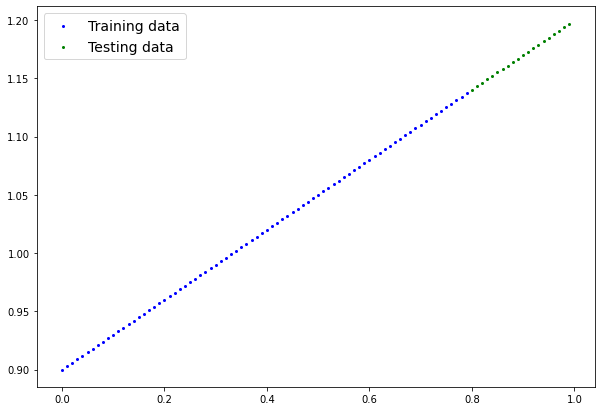

In [6]:
# Plot the training and testing data 
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue color
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot testing data in green color
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Plot predictions data in red if available
    if predictions != None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictinos")

    # Show the legend
    plt.legend(prop={"size": 14})

plot_prediction()

## 4. Build a PyTorch model

In [7]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float)
        )

        self.bias = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float)
        )

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [8]:
# Instantiate the model and put it to the target device
torch.manual_seed(42)

model_0 = LinearRegressionModel()

print(list(model_0.parameters()))
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


## 5. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.

In [9]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.01
)

In [10]:
# Training loop
torch.manual_seed(42)

# Train model for 300 epochs
epochs = 300

# Send data to target device
model_0.to(device)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

        # Put model in evaluation mode and setup inference context 
        model_0.eval()

        with torch.inference_mode():
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate test loss
            test_loss = loss_fn(test_pred, y_test)

            # Print out what's happening
            print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.757 | Test loss: 0.725
Epoch: 20 | Train loss: 0.525 | Test loss: 0.454
Epoch: 40 | Train loss: 0.294 | Test loss: 0.183
Epoch: 60 | Train loss: 0.077 | Test loss: 0.073
Epoch: 80 | Train loss: 0.053 | Test loss: 0.116
Epoch: 100 | Train loss: 0.046 | Test loss: 0.105
Epoch: 120 | Train loss: 0.039 | Test loss: 0.089
Epoch: 140 | Train loss: 0.032 | Test loss: 0.074
Epoch: 160 | Train loss: 0.025 | Test loss: 0.058
Epoch: 180 | Train loss: 0.018 | Test loss: 0.042
Epoch: 200 | Train loss: 0.011 | Test loss: 0.026
Epoch: 220 | Train loss: 0.004 | Test loss: 0.009
Epoch: 240 | Train loss: 0.004 | Test loss: 0.006
Epoch: 260 | Train loss: 0.004 | Test loss: 0.006
Epoch: 280 | Train loss: 0.004 | Test loss: 0.006


## 6. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data

In [11]:
# Make predictions with the model
model_0.eval()

with torch.inference_mode(): # turns off gradient tracking
    y_preds = model_0(X_test)

y_preds, y_test

(tensor([1.1464, 1.1495, 1.1525, 1.1556, 1.1587, 1.1617, 1.1648, 1.1679, 1.1709,
         1.1740, 1.1771, 1.1801, 1.1832, 1.1863, 1.1893, 1.1924, 1.1955, 1.1985,
         1.2016, 1.2047], device='cuda:0'),
 tensor([1.1400, 1.1430, 1.1460, 1.1490, 1.1520, 1.1550, 1.1580, 1.1610, 1.1640,
         1.1670, 1.1700, 1.1730, 1.1760, 1.1790, 1.1820, 1.1850, 1.1880, 1.1910,
         1.1940, 1.1970], device='cuda:0'))

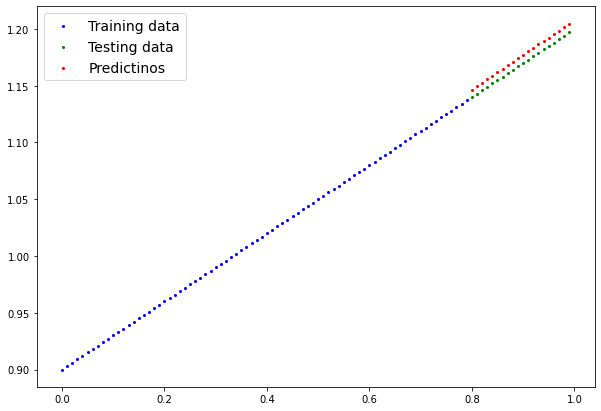

In [12]:
# Plot the predictions (these may need to be on a specific device)
plot_prediction(predictions=y_preds.cpu());

## 7. Save the trained model's `state_dict()` to file.
  * Create a new instance of the model class and load in the `state_dict()` we have just saved to it.
  * Perform predictions on the test data with the loaded model and confirm they match the original model predictions from the above.

In [13]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "lienar_regression_exercise_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"saving to {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


saving to models/lienar_regression_exercise_model_0.pth


In [14]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0.to(device)

print(f"Loaded model:\n{loaded_model_0}")
print(f"Model on device:\n{next(loaded_model_0.parameters()).device}")

Loaded model:
LinearRegressionModel()
Model on device:
cuda:0


In [15]:
# Make predictions with loaded model and compare them to the previous
loaded_model_0.eval()

with torch.inference_mode(): # turns off gradient tracking
    loaded_model_0_preds = model_0(X_test)

y_preds == loaded_model_0_preds

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True], device='cuda:0')